### 1. _Put phone in dev mode and installed Android ADB._
### 2. _Locate spotify usage and extract with ADB._
### 3. _Only one line of bash script really._
### 4. _Convert the txt to csv. et voila!._

In [10]:
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# not scientific numbers
pd.set_option('display.float_format', '{:.5f}'.format)
np.set_printoptions(suppress=True)


### _why am i rewriting this over and over - use a function silly!!_

In [11]:
def clean_usage_tables(file_path):
    # read - dropna - timestam to datetime - split to date & time columns sort byt date & time
    df = pd.read_csv(file_path)
    df = df.dropna()
    df = df.drop(columns=['Application'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Date'] = df['Timestamp'].dt.date
    df['Time'] = df['Timestamp'].dt.time
    df = df.sort_values(by=['Date', 'Time'])

    return df

## _1_

In [12]:
df1 = clean_usage_tables('data/my_spotify_usage_1.csv')
df1.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-16 11:31:05,USER_INTERACTION,2025-02-16,11:31:05
1,2025-02-16 11:31:06,ACTIVITY_RESUMED,2025-02-16,11:31:06
2,2025-02-16 11:31:24,FOREGROUND_SERVICE_START,2025-02-16,11:31:24
3,2025-02-16 11:31:24,NOTIFICATION_INTERRUPTION,2025-02-16,11:31:24
4,2025-02-16 11:31:27,ACTIVITY_PAUSED,2025-02-16,11:31:27


# _2_

In [13]:
df2 = clean_usage_tables('data/my_spotify_usage_2.csv')
df2.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-18 10:40:31,ACTIVITY_RESUMED,2025-02-18,10:40:31
1,2025-02-18 10:40:40,ACTIVITY_PAUSED,2025-02-18,10:40:40
2,2025-02-18 10:40:41,ACTIVITY_STOPPED,2025-02-18,10:40:41
3,2025-02-18 11:27:08,FOREGROUND_SERVICE_STOP,2025-02-18,11:27:08
4,2025-02-18 12:23:40,USER_INTERACTION,2025-02-18,12:23:40


# _3_

In [14]:
df3 = clean_usage_tables('data/my_spotify_usage_3.csv')
df3.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-19 10:15:28,FOREGROUND_SERVICE_START,2025-02-19,10:15:28
1,2025-02-19 10:15:28,NOTIFICATION_INTERRUPTION,2025-02-19,10:15:28
2,2025-02-19 10:15:32,FOREGROUND_SERVICE_START,2025-02-19,10:15:32
3,2025-02-19 10:15:32,FOREGROUND_SERVICE_STOP,2025-02-19,10:15:32
4,2025-02-19 10:25:48,FOREGROUND_SERVICE_STOP,2025-02-19,10:25:48


# _4_

In [15]:
df4 = clean_usage_tables('data/my_spotify_usage_4.csv')
df4.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-17 08:38:56,USER_INTERACTION,2025-02-17,08:38:56
1,2025-02-17 08:38:56,ACTIVITY_RESUMED,2025-02-17,08:38:56
2,2025-02-17 08:39:03,FOREGROUND_SERVICE_START,2025-02-17,08:39:03
3,2025-02-17 08:39:03,NOTIFICATION_INTERRUPTION,2025-02-17,08:39:03
4,2025-02-17 08:39:06,ACTIVITY_PAUSED,2025-02-17,08:39:06


# _5_

In [16]:
df5 = clean_usage_tables('data/my_spotify_usage_5.csv')
df5.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-20 09:56:58,USER_INTERACTION,2025-02-20,09:56:58
1,2025-02-20 09:56:58,ACTIVITY_RESUMED,2025-02-20,09:56:58
2,2025-02-20 09:57:02,ACTIVITY_PAUSED,2025-02-20,09:57:02
3,2025-02-20 09:57:02,SHORTCUT_INVOCATION,2025-02-20,09:57:02
4,2025-02-20 09:57:02,SHORTCUT_INVOCATION,2025-02-20,09:57:02


# _6_

In [17]:
df6 = clean_usage_tables('data/my_spotify_usage_6.csv')
df6.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-21 09:42:32,FOREGROUND_SERVICE_START,2025-02-21,09:42:32
1,2025-02-21 09:42:32,NOTIFICATION_INTERRUPTION,2025-02-21,09:42:32
2,2025-02-21 09:42:37,FOREGROUND_SERVICE_START,2025-02-21,09:42:37
3,2025-02-21 09:42:39,FOREGROUND_SERVICE_STOP,2025-02-21,09:42:39
4,2025-02-21 09:55:27,FOREGROUND_SERVICE_STOP,2025-02-21,09:55:27


## _mearge all_

In [18]:
my_spotify_usage = pd.concat([df1,df2,df3,df5,df5,df6]).drop_duplicates(subset=['Timestamp'])


In [19]:
my_spotify_usage.sort_values(by=['Date'])

cleaned_my_spotify_usage = my_spotify_usage.reset_index(drop=True)


In [20]:
cleaned_my_spotify_usage.head()

,Timestamp,Activity Type,Date,Time
0,2025-02-16 11:31:05,USER_INTERACTION,2025-02-16,11:31:05
1,2025-02-16 11:31:06,ACTIVITY_RESUMED,2025-02-16,11:31:06
2,2025-02-16 11:31:24,FOREGROUND_SERVICE_START,2025-02-16,11:31:24
3,2025-02-16 11:31:27,ACTIVITY_PAUSED,2025-02-16,11:31:27
4,2025-02-16 11:31:34,ACTIVITY_PAUSED,2025-02-16,11:31:34


### _plot daily interactions with Spotify mobile app_

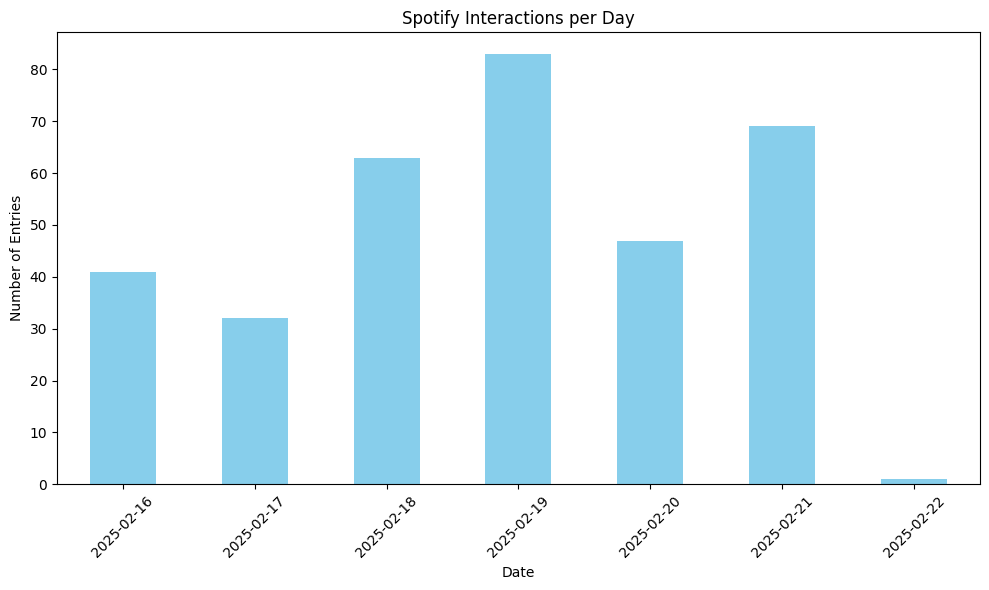

In [21]:
daily_spotify_activity = cleaned_my_spotify_usage.groupby('Date').size()

#bar chart
plt.figure(figsize=(10, 6))
daily_spotify_activity.plot(kind='bar', color='skyblue')
plt.title('Spotify Interactions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# _get first and last per day_

In [22]:
# group by date - find first and last

first_and_last = cleaned_my_spotify_usage.groupby('Date').agg(
    first_interaction=('Time', 'first'),
    last_interaction=('Time', 'last')
).reset_index()

pprint.pprint(first_and_last)

         Date first_interaction last_interaction
0  2025-02-16          11:31:05         20:02:12
1  2025-02-17          00:09:46         11:28:46
2  2025-02-18          10:40:31         22:41:26
3  2025-02-19          08:12:45         21:56:25
4  2025-02-20          09:56:58         20:05:21
5  2025-02-21          08:48:50         20:54:54
6  2025-02-22          01:37:55         01:37:55


* value counts for ACTIVITY_RESUMED, FOREGROUND_SERVICE_START, SHORTCUT_INVOCATION
    * display in chart

# filter for activity types
activity_filter = raw_df[raw_df['Activity Type'].isin(['ACTIVITY_RESUMED', 'FOREGROUND_SERVICE_START', 'SHORTCUT_INVOCATION'])]

# counts for each type
activity_count = activity_filter['Activity Type'].value_counts()

activity_count